# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
print(weather_api_key)

46d479ed96c458e8e6f198f0ee9873d7


## Generate Cities List

In [24]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [25]:
print(cities)

['ushuaia', 'katsuura', 'mataura', 'rudnogorsk', 'yar-sale', 'tasiilaq', 'san andres', 'churapcha', 'wulanhaote', 'bethel', 'sao filipe', 'bredasdorp', 'luderitz', 'chuy', 'bilma', 'nanortalik', 'vaini', 'ulladulla', 'kochi', 'araouane', 'singleton', 'ruteng', 'los llanos de aridane', 'georgiyevka', 'saint-denis', 'san angelo', 'punta arenas', 'kununurra', 'bluff', 'hasaki', 'saint-pascal', 'waingapu', 'rikitea', 'arraial do cabo', 'zaysan', 'torbay', 'caravelas', 'den helder', 'butaritari', 'warqla', 'kodiak', 'tuktoyaktuk', 'hanyang', 'san patricio', 'thompson', 'lagoa', 'sinnamary', 'barrow', 'kapaa', 'alyangula', 'thinadhoo', 'castro', 'stoyba', 'cape town', 'faanui', 'severomorsk', 'east london', 'berlevag', 'new norfolk', 'stornoway', 'hermanus', 'cortez', 'pundaguitan', 'severo-kurilsk', 'saleaula', 'racine', 'eloy', 'lompoc', 'hilo', 'ishigaki', 'albany', 'pevek', 'port hardy', 'grand river south east', 'havelock', 'olafsvik', 'saint anthony', 'parauna', 'busselton', 'guerrero 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
#Lists and counters
city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lats_list = []
lngs_list = []
temp_max_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1


print("Beginning Data Retrieval ")
print("-------------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#For loop matching city names with city_list using enumerate method
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lats_list.append(response["coord"]["lat"])
        lngs_list.append(response["coord"]["lon"])
        temp_max_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval 
-------------------------------
Processing Record 1 of Set 1 : ushuaia
Processing Record 2 of Set 1 : katsuura
Processing Record 3 of Set 1 : mataura
Processing Record 4 of Set 1 : rudnogorsk
Processing Record 5 of Set 1 : yar-sale
Processing Record 6 of Set 1 : tasiilaq
Processing Record 7 of Set 1 : san andres
Processing Record 8 of Set 1 : churapcha
City not found. Skipping...
Processing Record 9 of Set 1 : bethel
Processing Record 10 of Set 1 : sao filipe
Processing Record 11 of Set 1 : bredasdorp
Processing Record 12 of Set 1 : luderitz
Processing Record 13 of Set 1 : chuy
Processing Record 14 of Set 1 : bilma
Processing Record 15 of Set 1 : nanortalik
Processing Record 16 of Set 1 : vaini
Processing Record 17 of Set 1 : ulladulla
Processing Record 18 of Set 1 : kochi
Processing Record 19 of Set 1 : araouane
Processing Record 20 of Set 1 : singleton
Processing Record 21 of Set 1 : ruteng
Processing Record 22 of Set 1 : los llanos de aridane
Processing Rec

Processing Record 31 of Set 4 : akcakoca
Processing Record 32 of Set 4 : blagoveshchenka
Processing Record 33 of Set 4 : esperance
Processing Record 34 of Set 4 : huaihua
Processing Record 35 of Set 4 : pachino
Processing Record 36 of Set 4 : kavieng
Processing Record 37 of Set 4 : berbera
Processing Record 38 of Set 4 : kizilskoye
Processing Record 39 of Set 4 : quatre cocos
Processing Record 40 of Set 4 : vardo
Processing Record 41 of Set 4 : salisbury
Processing Record 42 of Set 4 : broome
Processing Record 43 of Set 4 : ust-nera
Processing Record 44 of Set 4 : ballina
Processing Record 45 of Set 4 : ostrovnoy
Processing Record 46 of Set 4 : atambua
Processing Record 47 of Set 4 : vila franca do campo
Processing Record 48 of Set 4 : bandarbeyla
Processing Record 49 of Set 4 : hualmay
Processing Record 50 of Set 4 : talaya
Processing Record 0 of Set 5 : teberda
City not found. Skipping...
Processing Record 1 of Set 5 : khatanga
Processing Record 2 of Set 5 : coquimbo
Processing Recor

Processing Record 13 of Set 8 : muana
Processing Record 14 of Set 8 : chalus
Processing Record 15 of Set 8 : alvorada
Processing Record 16 of Set 8 : kudahuvadhoo
Processing Record 17 of Set 8 : rapid valley
Processing Record 18 of Set 8 : rawson
Processing Record 19 of Set 8 : aluksne
Processing Record 20 of Set 8 : dores do indaia
Processing Record 21 of Set 8 : alofi
Processing Record 22 of Set 8 : luque
Processing Record 23 of Set 8 : yerbogachen
Processing Record 24 of Set 8 : kamthi
Processing Record 25 of Set 8 : gampaha
Processing Record 26 of Set 8 : puerto escondido
Processing Record 27 of Set 8 : mercedes
Processing Record 28 of Set 8 : forest grove
Processing Record 29 of Set 8 : hun
Processing Record 30 of Set 8 : chiang khong
Processing Record 31 of Set 8 : dauphin
Processing Record 32 of Set 8 : antofagasta
Processing Record 33 of Set 8 : natal
Processing Record 34 of Set 8 : margate
Processing Record 35 of Set 8 : gorontalo
Processing Record 36 of Set 8 : the pas
Proces

Processing Record 0 of Set 12 : rapar
Processing Record 1 of Set 12 : kungurtug
Processing Record 2 of Set 12 : aksum
Processing Record 3 of Set 12 : vylkove
-------------------------------
Data Retrieval Complete
-------------------------------


In [30]:
#Create a dataframe using information from data retrieval
weather_df = pd.DataFrame({
    "City" : city_list,
    "Lat" : lats_list,
    "Lng" : lngs_list,
    "Max Temp" : temp_max_list,
    "Humidity" : humidity_list,
    "Cloudiness" : cloudiness_list,
    "Wind Speed" : wind_speed_list,
    "Country" : country_list,
    "Date" : date_list    })

In [31]:
weather_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [32]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,37.20,93,82,9.42,AR,1615618673
1,Katsuura,35.1333,140.3000,57.20,88,75,17.27,JP,1615619111
2,Mataura,-46.1927,168.8643,62.01,72,0,3.00,NZ,1615619111
3,Rudnogorsk,57.2639,103.7519,20.57,77,100,6.78,RU,1615619111
4,Yar-Sale,66.8333,70.8333,-9.74,81,100,15.26,RU,1615619111


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
# Export the City_Data into a csv
weather_df.to_csv("output_data/cities.csv")
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,37.20,93,82,9.42,AR,1615618673
1,Katsuura,35.1333,140.3000,57.20,88,75,17.27,JP,1615619111
2,Mataura,-46.1927,168.8643,62.01,72,0,3.00,NZ,1615619111
3,Rudnogorsk,57.2639,103.7519,20.57,77,100,6.78,RU,1615619111
4,Yar-Sale,66.8333,70.8333,-9.74,81,100,15.26,RU,1615619111
...,...,...,...,...,...,...,...,...,...
559,Şercaia,45.8333,25.1333,37.00,89,100,2.10,RO,1615619240
560,Rāpar,23.5667,70.6333,91.56,22,0,4.92,IN,1615619240
561,Kungurtug,50.5994,97.5228,47.03,51,100,4.21,RU,1615619241
562,Axum,14.1245,38.7244,75.65,22,100,14.56,ET,1615619241


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [34]:
#check if there are any cities with >100% humidity
test_stats = weather_df["Humidity"].describe(include = "all")
print("By inspection, the maximum humidity value is 100%, so there are no values greater than 100% in our data!")
test_stats

# weather_df["humidity"].value_counts()

By inspection, the maximum humidity value is 100%, so there are no values greater than 100% in our data!


count    564.000000
mean      71.932624
std       21.535193
min        5.000000
25%       62.000000
50%       77.000000
75%       88.000000
max      100.000000
Name: Humidity, dtype: float64

In [35]:
#  Get the indices of cities that have humidity over 100%.


In [36]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

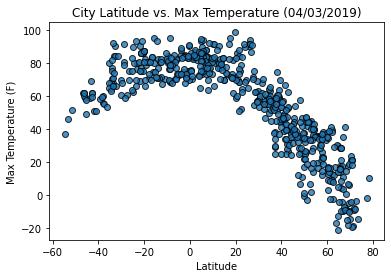

In [37]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (04/03/2019)")
plt.savefig("output_data/Max_temp.png")

This plot is showing the decrease in temperature as your move further North per the Latitude and therefore further away from the equator.  This also shows that the Northern Hemisphere is in fact much colder than the Southern Hemisphere and contains more cities that are in colder areas.

## Latitude vs. Humidity Plot

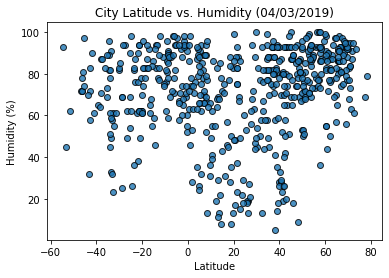

In [38]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (04/03/2019)")
plt.savefig("output_data/Humidity.png")

This plot is showing that the higher humidity is actually found at 0 degrees (the equator) or north of 0 degrees or the Northern Hemisphere. So there are more cities in areas of high humidity close to the equator and the Northern Hemisphere.

## Latitude vs. Cloudiness Plot

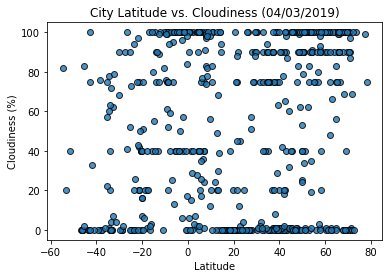

In [39]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (04/03/2019)")
plt.savefig("output_data/Cloudiness.png")

This plot is showing the location of a city in relation to how cloudy they are.  From this plot you can see that there are multiple cities which have zero clouds and actually 100% clouds.  It also shows that the least amount of cloudy cities are near the equator and as you more either north or south on the latitudes there are more cities that are cloudy.

## Latitude vs. Wind Speed Plot

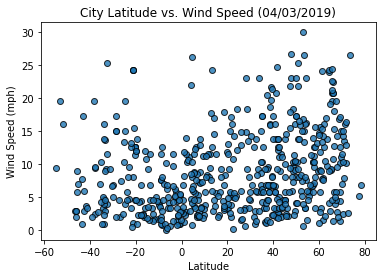

In [40]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (04/03/2019)")
plt.savefig("output_data/Wind_Speed.png")

This plot is showing the Latitude location versus the wind speed in that location.  From the plot we can see that the wind speed in many cities is below 10 mph. There are several cities close to zero wind speeds and very few cities with higher than 20 mph wind speeds.

## Linear Regression

In [41]:
 # Create Northern and Southern Hemisphere DataFrames
L=0
Northern = weather_df.query(f"Lat >= {L}")
Southern = weather_df.query(f"Lat <= {L}")


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The coefficient of determination(R^2) is: 0.8136955362827263


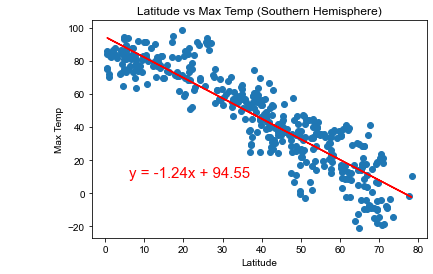

In [42]:
x_values=Northern['Lat']
y_values=Northern['Max Temp']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#Print on graph
R2="R^2="+str(round(rvalue,4))
plt.annotate(R2,(-25,11),fontsize=15,color="red")

# Label plot
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Latitude vs Max Temp (Southern Hemisphere)')
plt.style.use('seaborn')

# Print r square value

print(f"The coefficient of determination(R^2) is: {rvalue**2}")


# Show plot
plt.savefig("output_data/NH_Max_Temp_Lat_Regression.png")
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The coefficient of determination(R^2) is: 0.337172844429488


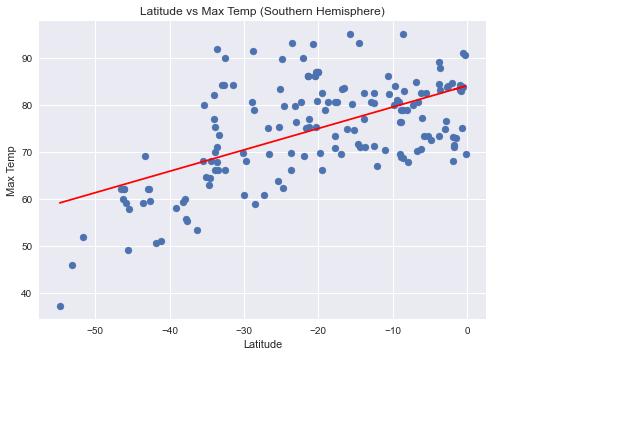

In [43]:
x_values=Southern['Lat']
y_values=Southern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Latitude vs Max Temp (Southern Hemisphere)')
plt.style.use('seaborn')


# Print r square value
print(f"The coefficient of determination(R^2) is: {rvalue**2}")

# Show plot
plt.savefig("output_data/SH_Max_Temp_Lat_Regression.png")
plt.show()


These two graphs show how the temperature decreases in the Northern Hemisphere and then how the temperature increases as you move closer to 0 degrees or the equator.  There is a negative correlation with the Northern Hemisphere plot and a positive correlation with the Southern Hemisphere plot.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The coefficient of determination(R^2) is: 0.118739907954452


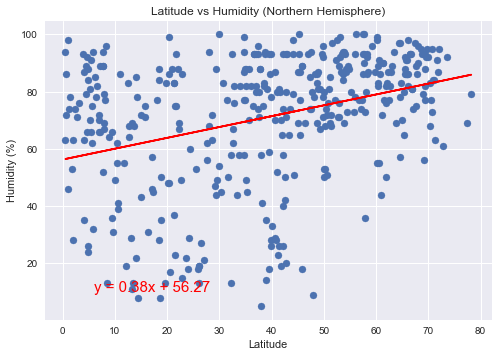

In [44]:
x_values=Northern['Lat']
y_values=Northern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('Latitude vs Humidity (Northern Hemisphere)')
plt.style.use('seaborn')


# Print r square value
print(f"The coefficient of determination(R^2) is: {rvalue**2}")

# Show plot
plt.savefig("output_data/NH_Humidity_Lat_Regression.png")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The coefficient of determination(R^2) is: 0.060013755687467876


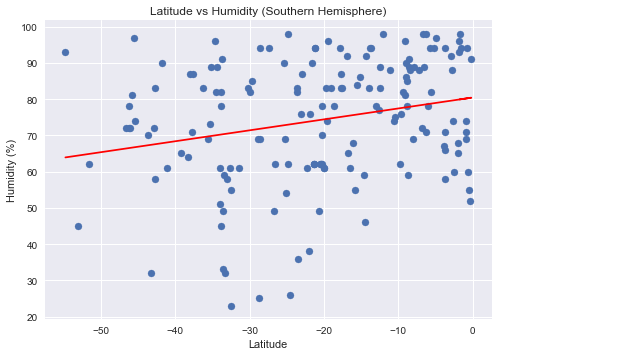

In [45]:
x_values=Southern['Lat']
y_values=Southern['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('Latitude vs Humidity (Southern Hemisphere)')
plt.style.use('seaborn')


# Print r square value
print(f"The coefficient of determination(R^2) is: {rvalue**2}")


# Show plot
plt.savefig("output_data/SH_Humidity_Lat_Regression.png")
plt.show()


These two plots show that there is not a significant correlation with the humidity percentage in the Northern and Southern hemispheres. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The coefficient of determination(R^2) is: 0.04876322453062143


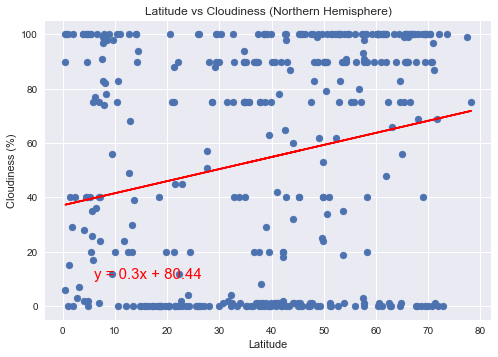

In [46]:
x_values=Northern['Lat']
y_values=Northern['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('Latitude vs Cloudiness (Northern Hemisphere)')
plt.style.use('seaborn')

# Print r square value
print(f"The coefficient of determination(R^2) is: {rvalue**2}")


# Show plot
plt.savefig("output_data/NH_Cloudiness_Lat_Regression.png")
plt.show()



####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The coefficient of determination(R^2) is: 0.19507153101809435


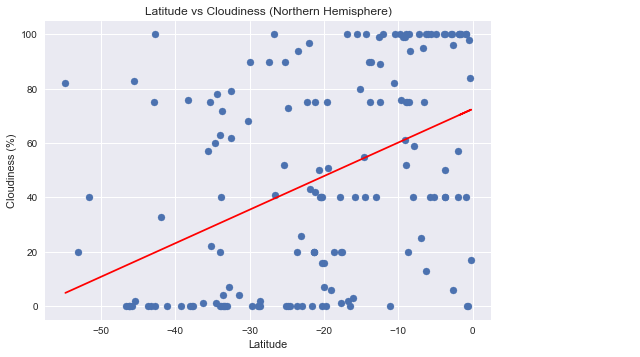

In [47]:
x_values=Southern['Lat']
y_values=Southern['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('Latitude vs Cloudiness (Northern Hemisphere)')
plt.style.use('seaborn')

# Print r square value
print(f"The coefficient of determination(R^2) is: {rvalue**2}")

# Show plot
plt.savefig("output_data/SH_Cloudiness_Lat_Regression.png")
plt.show()


Since there are spots all over each of these two plots, there is no significant correlation between the latitude and the cloudiness in the Northern or Southern Hemispheres.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The coefficient of determination(R^2) is: 0.055190176005637574


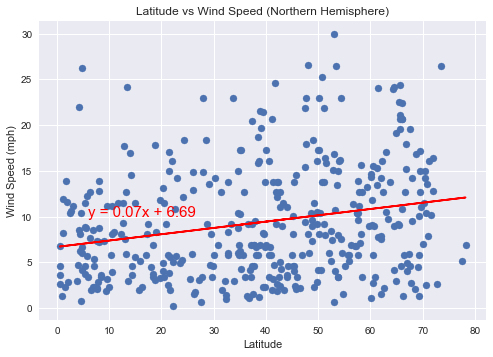

In [50]:
x_values=Northern['Lat']
y_values=Northern['Wind Speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('Latitude vs Wind Speed (Northern Hemisphere)')
plt.style.use('seaborn')

# Print r square value
print(f"The coefficient of determination(R^2) is: {rvalue**2}")

# Show plot

plt.savefig("output_data/NH_Wind_Speed_Lat_Regression.png")
plt.show()




####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The coefficient of determination(R^2) is: 0.06887084062229969


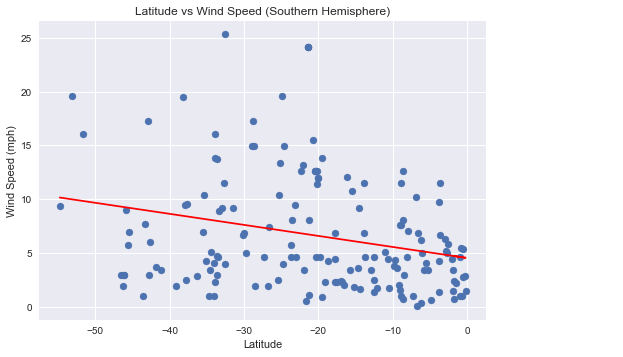

In [49]:
x_values=Southern['Lat']
y_values=Southern['Wind Speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('Latitude vs Wind Speed (Southern Hemisphere)')
plt.style.use('seaborn')

# Print r square value
print(f"The coefficient of determination(R^2) is: {rvalue**2}")


# Show plot

plt.savefig("output_data/SH_Wind_Speed_Lat_Regression.png")

plt.show()



These two plots show that there really is not correlation between the latitude location in the Northern or Southern Hemisphere and wind speed.